# Определение перспективного тарифа для телеком-компании

В нашем распоряжении данные 500 пользователей федерального оператора сотовой связи «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.
Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

**Описание тарифов:**

**Тариф «Смарт»**
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
* минута разговора: 3 рубля
* сообщение: 3 рубля
* 1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
* минута разговора: 1 рубль
* сообщение: 1 рубль
* 1 Гб интернет-трафика: 150 рублей

«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

**Цель исследования:** проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Задачи исследования:**
- описать поведение клиентов оператора, исходя из выборки
- посчитать среднее количество, дисперсию и стандартное отклонение
- построить гистограммы
- описать распределения

Данные будут получены из следующих файлов:
* `/datasets/calls.csv`
* `/datasets/internet.csv`
* `/datasets/messages.csv`
* `/datasets/tariffs.csv`
* `/datasets/users.csv`

Таким образом, исследование пройдёт в пять этапов:
1. Обзор данных
2. Подготовка данных
3. Анализ данных
4. Проверка гипотез
5. Общий вывод

<h1>Содержание работы<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Обзор данных

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from math import factorial
import numpy as np
import seaborn as sns
from scipy import stats as st

Объявим переменные с исходными данными, пускай индексом будет первый столбец:

In [2]:
calls = pd.read_csv('calls.csv')
internet = pd.read_csv('internet.csv')
messages = pd.read_csv('messages.csv')
tariffs = pd.read_csv('tariffs.csv')
users = pd.read_csv('users.csv')

Посмотрим как выглядят данные и их основные статистики:

In [3]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
calls.user_id.nunique()

492

In [5]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [6]:
internet = pd.read_csv('internet.csv', index_col=[0])

In [7]:
internet.user_id.nunique()

497

In [8]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [9]:
messages.user_id.nunique()

426

In [10]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [11]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [12]:
users.user_id.nunique()

500

In [13]:
users.query('churn_date.notna()').head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
19,1019,63,2018-10-05,Томск,Игнатий,Круглов,2018-05-16,ultra
20,1020,59,2018-12-18,Чита,Тала,Костина,2018-10-22,smart
34,1034,66,2018-11-21,Вологда,Святослав,Бондарев,2018-08-26,smart
50,1050,44,2018-10-03,Тюмень,Рузана,Аничкина,2018-06-16,ultra
51,1051,37,2018-10-14,Москва,Кристина,Сомова,2018-05-28,smart


In [14]:
for data in [calls, internet, messages, tariffs, users]:
    print(data.info(), end='\n\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-N

В исходных данных пропуски не наблюдаются. Там где необходимо, стоит привести к типу данных "datetime" и округлить значения. Секунды в большую сторону до минут, общая сумма трафика за месяц в мегабайтах в большую сторону до гигабайтов.

## Подготовка данных

**Приведем данные к нужным типам:**

In [15]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

**Округлим значения согласно условиям:**

In [16]:
calls['duration'] = calls['duration'].apply(np.ceil)

**Добавим столбец с месяцем:**

In [17]:
calls['month'] = calls['call_date'].dt.month
messages['month'] = messages['message_date'].dt.month
internet['month'] = internet['session_date'].dt.month

Посмотрим что получилось

In [18]:
internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


**Рассчёт по каждому пользователю**

Ниже будут использоваться сводные таблицы,тоит создать столбец в котором будет содержаться единое уникальное обозначение пользователя отличное от user_id. Составить его можно из столбцов "first_name", "last_name" и "city_name":

In [19]:
users['user'] = users['user_id']

Создадим сводную таблицу по звонкам:

In [20]:
calls_grouped = calls.merge(users, on='user_id', how='inner')
calls_grouped = calls_grouped.pivot_table(values=['user', 'duration'], 
                       index=['user_id', 'month'], 
                       aggfunc={'user': 'count', 'duration': 'sum'})
calls_grouped.columns = ['duration', 'calls']

Создадим сводную таблицу по сообщениям:

In [21]:
messages_grouped = messages.merge(users, on='user_id', how='inner')
messages_grouped = messages_grouped.pivot_table(values='user', 
                       index=['user_id', 'month'], 
                       aggfunc={'user': 'count'})
messages_grouped.columns = ['messages']

Создадим сводную таблицу по трафику:

In [22]:
internet_grouped = internet.merge(users, on='user_id', how='inner')
internet_grouped = internet_grouped.pivot_table(values='mb_used', 
                       index=['user_id', 'month'], 
                       aggfunc={'mb_used': 'sum'})
internet_grouped.columns = ['mb_used']

Теперь соберём всё в единую сводную таблицу:

In [23]:
merged_pivot = pd.merge(internet_grouped, calls_grouped, 'left', on=['user_id', 'month'])
merged_pivot = pd.merge(merged_pivot, messages_grouped, 'left', on=['user_id', 'month'])
merged_pivot.head(10)

mb_used  duration  calls  messages
user_id month                                     
1000    5       2253.49     159.0   22.0      22.0
        6      23233.77     172.0   43.0      60.0
        7      14003.64     340.0   47.0      75.0
        8      14055.93     408.0   52.0      81.0
        9      14568.91     466.0   58.0      57.0
        10     14702.49     350.0   57.0      73.0
        11     14756.47     338.0   43.0      58.0
        12      9817.61     333.0   46.0      70.0
1001    11     18429.34     430.0   59.0       NaN
        12     14036.66     414.0   63.0       NaN

In [24]:
merged_pivot.reset_index().user_id.nunique()

497

Пропущенные значения заменяем на нули:

In [25]:
merged_pivot.loc[merged_pivot['duration'].isna(), 'duration'] = 0
merged_pivot.loc[merged_pivot['messages'].isna(), 'messages'] = 0
merged_pivot.loc[merged_pivot['mb_used'].isna(), 'mb_used'] = 0

Добавим наименование используемого тарифа для каждого пользователя:

In [26]:
for user in merged_pivot.index:
    merged_pivot.loc[user, 'tariff'] = users.loc[user[0]-1000, 'tariff']

In [27]:
merged_pivot

mb_used  duration  calls  messages tariff
user_id month                                            
1000    5       2253.49     159.0   22.0      22.0  ultra
        6      23233.77     172.0   43.0      60.0  ultra
        7      14003.64     340.0   47.0      75.0  ultra
        8      14055.93     408.0   52.0      81.0  ultra
        9      14568.91     466.0   58.0      57.0  ultra
...                 ...       ...    ...       ...    ...
1498    10     20579.36     247.0   41.0      42.0  smart
1499    9       1845.75      70.0    9.0      11.0  smart
        10     17788.51     449.0   68.0      48.0  smart
        11     17963.31     612.0   74.0      59.0  smart
        12     13055.58     492.0   69.0      66.0  smart

[3203 rows x 5 columns]

Теперь можно посчитать помесячную выручку с каждого клиента. Для этого следует вычесть бесплатные лимиты из количества звонков, сообщений и трафика, умножить на стоимость по тарифу и прибавить абонентскую платупо тарифу.

Напишем функцию для подсчета выручки с каждого пользователя в каждый из месяцев:

In [28]:
def rev_by_user(row):
    duration = row['duration']
    calls = row['calls']
    messages = row['messages']
    mb_used = row['mb_used']
    tariff = row['tariff']
    
    if tariff == 'smart':
        duration_overrun = duration - tariffs.loc[0, 'minutes_included']
        messages_overrun = messages - tariffs.loc[0, 'messages_included']
        gb_overrun = np.ceil((mb_used - tariffs.loc[0, 'mb_per_month_included']) / 1024)
                
        if duration_overrun < 0: duration_overrun = 0
        if messages_overrun < 0: messages_overrun = 0
        if gb_overrun < 0: gb_overrun = 0
                
        return (tariffs.loc[0, 'rub_per_minute'] * duration_overrun +
                tariffs.loc[0, 'rub_per_message'] * messages_overrun +
                tariffs.loc[0, 'rub_per_gb'] * gb_overrun +
                tariffs.loc[0, 'rub_monthly_fee']
               ) 
    else:
        duration_overrun = duration - tariffs.loc[1, 'minutes_included']
        messages_overrun = messages - tariffs.loc[1, 'messages_included']
        gb_overrun = np.ceil((mb_used - tariffs.loc[1, 'mb_per_month_included']) / 1024)
        
        if duration_overrun < 0: duration_overrun = 0
        if messages_overrun < 0: messages_overrun = 0
        if gb_overrun < 0: gb_overrun = 0
        
        return (tariffs.loc[1, 'rub_per_minute'] * duration_overrun +
                tariffs.loc[1, 'rub_per_message'] * messages_overrun +
                tariffs.loc[1, 'rub_per_gb'] * gb_overrun +
                tariffs.loc[1, 'rub_monthly_fee']
               )

merged_pivot['revenue'] = merged_pivot.apply(rev_by_user, axis=1)
merged_pivot.head(20)

mb_used  duration  calls  messages tariff  revenue
user_id month                                                     
1000    5       2253.49     159.0   22.0      22.0  ultra   1950.0
        6      23233.77     172.0   43.0      60.0  ultra   1950.0
        7      14003.64     340.0   47.0      75.0  ultra   1950.0
        8      14055.93     408.0   52.0      81.0  ultra   1950.0
        9      14568.91     466.0   58.0      57.0  ultra   1950.0
        10     14702.49     350.0   57.0      73.0  ultra   1950.0
        11     14756.47     338.0   43.0      58.0  ultra   1950.0
        12      9817.61     333.0   46.0      70.0  ultra   1950.0
1001    11     18429.34     430.0   59.0       0.0  smart   1150.0
        12     14036.66     414.0   63.0       0.0  smart    550.0
1002    6      10856.82     117.0   15.0       4.0  smart    550.0
        7      17580.10     214.0   26.0      11.0  smart   1150.0
        8      20319.26     289.0   42.0      13.0  smart   1550.0
        9      16691.08     206.0   36.0       4.0  smart    950.0
        10     13888.25     212.0   33.0      10.0  smart    550.0
        11     18587.28     243.0   32.0      16.0  smart   1350.0
        12     18113.73     236.0   33.0      12.0  smart   1150.0
1003    8       8565.21     380.0   55.0      37.0  ultra   1950.0
        9      12468.87     961.0  134.0      91.0  ultra   1950.0
        10     14768.14     855.0  108.0      83.0  ultra   1950.0

## Анализ данных

Найдём медианные показатели потребления звонков, сообщений и интернет-трафика для каждого пользователя:

In [29]:
median = merged_pivot.pivot_table(index='user_id', values=['duration', 'messages', 'mb_used', 'revenue'], aggfunc='median')
for user_id in users['user_id']:
    median.loc[user_id, 'tariff'] = users.loc[user_id - 1000, 'tariff']
median.head()

,duration,mb_used,messages,revenue,tariff
user_id,,,,,
1000,339.0,14312.42,65.0,1950.0,ultra
1001,422.0,16233.00,0.0,850.0,smart
1002,214.0,17580.10,11.0,1150.0,smart
1003,824.0,11356.89,83.0,1950.0,ultra
1004,132.5,17810.53,154.5,1950.0,ultra


Теперь можем поработать над представлением описательной статистики для тарифов:

In [30]:
median.dropna(subset=['duration'], inplace=True)
d_stats = median.pivot_table(index='tariff', values=['duration', 'messages', 'mb_used'],
                             aggfunc={'duration': [np.median, np.var, np.std],
                                      'messages': [np.median, np.var, np.std],
                                      'mb_used': [np.median, np.var, np.std]
                                     })
d_stats

duration                              mb_used              \
         median        std           var      median         std   
tariff                                                             
smart    439.75  160.26620  25685.254992  16963.4425  4174.14787   
ultra    537.00  303.88866  92348.317654  19809.9950  8756.77636   

                     messages                          
                 var   median        std          var  
tariff                                                 
smart   1.742351e+07     28.5  28.010568   784.591946  
ultra   7.668113e+07     47.5  49.372989  2437.692084

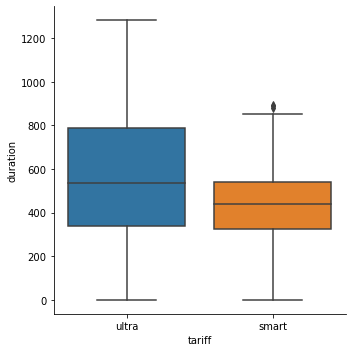

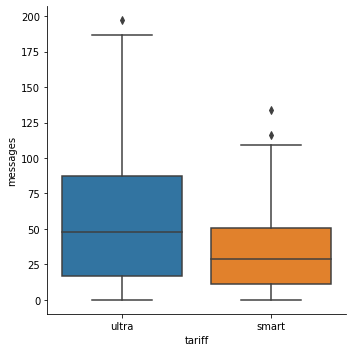

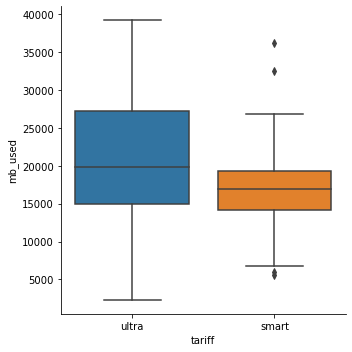

In [31]:
for column in ['duration', 'messages', 'mb_used']:    
    sns.catplot(x="tariff", y=column, kind="box", data=median)

Наглядно, что продолжительность звонков, количество сообщений и объем потребялемого трафика по тарифу "Ультра"  по сравнению с тарифом "Смарт" имеет большую дисперсию, а медианые показатели по всем параметрам использования тарифа больше. Также, выбросов в рамках тарифа "Смарт" заметно больше.

Попробуем углубиться и посмотреть как выглядит разброс показателей:

array([<AxesSubplot:title={'center':'smart'}>,
       <AxesSubplot:title={'center':'ultra'}>], dtype=object)

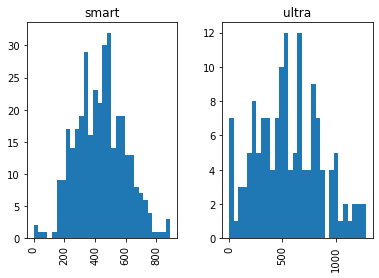

In [32]:
median.hist(column='duration', by='tariff', bins=30)

array([<AxesSubplot:title={'center':'smart'}>,
       <AxesSubplot:title={'center':'ultra'}>], dtype=object)

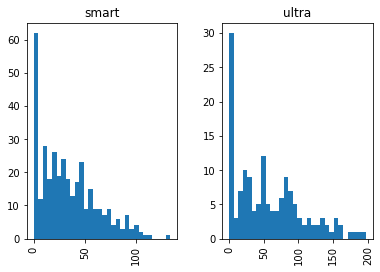

In [33]:
median.hist(column='messages', by='tariff', bins=30)

array([<AxesSubplot:title={'center':'smart'}>,
       <AxesSubplot:title={'center':'ultra'}>], dtype=object)

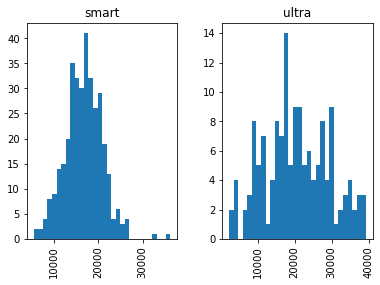

In [34]:
median.hist(column='mb_used', by='tariff', bins=30)

**Вывод**

Гистрограммы показывают, что дисперсия по всем показателем тарифа "Смарт" меньше, чем у пользователей с более дорогим тарифом: по продолжительность звонков, по числу сообщений и объему потребялемого трафика.

Можно судить о том, что паттерны использования возможностей тарифа среди пользователей "Ультра" более разнообразны. Пользователи дорогого тарифа ведут себя свободнее в выборе того, как им тратить доступные минуты, сообщения и гигабайты.

## Проверка гипотез

Проверим гипотезу о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются. Ниже будет использован тест для сравнения средних двух генеральных совокупностей между собой. Пусть критический уровень статистической значимости будет задан значением 0,01. Так как разброс данных по разным тарифам заметно отличается, передадим параметру "equal_var" значение False.
За нулевую гипотезу следует принять обратное утверждение:
- H0 - средняя выручка пользователей тарифа "Ультра" равна средней выручке пользователей тарифа "Смарт"
- H1 - средняя выручка пользователей тарифов "Ультра" и "Смарт" различаются


In [35]:
smart = merged_pivot.query('tariff == "smart"')['revenue']
ultra = merged_pivot.query('tariff == "ultra"')['revenue']
alpha = 0.01

results = st.ttest_ind(
    ultra, 
    smart, 
    equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.22403940028982e-249
Отвергаем нулевую гипотезу


In [36]:
merged_pivot.pivot_table(index='tariff', values='revenue', aggfunc='median')

,revenue
tariff,
smart,1026.5
ultra,1950.0


<AxesSubplot:title={'center':'revenue'}, xlabel='tariff'>

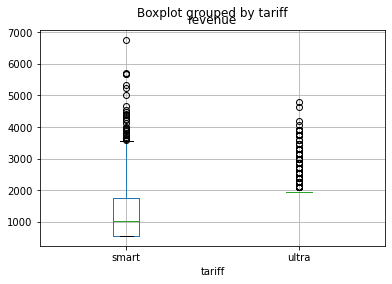

In [37]:
merged_pivot.boxplot(column='revenue', by='tariff')

Средние показатели выручки по тарифам отличаются почти в 2 раза. Пользователь, у которого подключен тариф "Смарт" с ежемесячной платой в 550 рублей, с большой вероятностью по итогам месяца заплатит гораздо больше из-за нехватки доступных по условиям тарифа пакетов минут, сообщений и гигабайт.

Можно сделать вывод о том, что доходы оператора от пользователей с тарифом "Ультра" действительно отличаются по сравнению с доходами от пользователей тарифа "Смарт".

Похожим образом проверим гипотезу о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов:
- H0 - средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов
- H1 - средняя выручка пользователей из Москвы отличается от средней выручке пользователей из других регионов

In [38]:
for user in merged_pivot.index:
    merged_pivot.loc[user, 'city'] = users.loc[user[0]-1000, 'city']

moscow = merged_pivot.query('city == "Москва"')['revenue']
other_reg = merged_pivot.query('city != "Москва"')['revenue']

alpha = 0.01

results = st.ttest_ind(
    moscow, 
    other_reg, 
    equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5023167352991608
Не получилось отвергнуть нулевую гипотезу


In [39]:
def sort_reg(city):
    if city == 'Москва': return 'Москва'
    else: return 'другие регионы'
    
merged_pivot['region'] = merged_pivot['city'].apply(sort_reg)
merged_pivot.pivot_table(index='region', values='revenue', aggfunc='median')

,revenue
region,
Москва,1750.0
другие регионы,1575.0


<AxesSubplot:title={'center':'revenue'}, xlabel='region'>

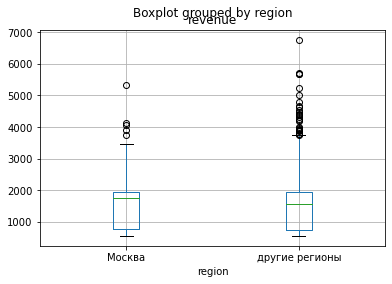

In [40]:
merged_pivot.boxplot(column='revenue', by='region')

Результаты теста не опровергают нулевую гипотезу о том, что доходы от пользователей из Москвы и из других регионов равны. Видно, что доходы от пользователей в Москве не отличаются значительно от пользователей в других городах.

## Общий вывод

Результаты анализа позволяют сделать следующие суждение о том, что доходы от клиентов с тарифом «Ультра» больше, чем от тарифа "Смарт". В среднем оператор "Мегалайн" получает от одного пользователя с дорогим тарифом 1950 рублей и 1026.5 рубля от пользователя с дешёвым тарифом.

Кроме того были выявлены особенности использования тарифов оператора. Пользователи тарифа "Смарт" выходят за рамки тарифных пакетов, кроме обязательной абонентской платы в среднем пользователь доплачивает 476 рубля, что составляет 86,5% от базовой стоимости.
Напротив, пользователи тарифа "Ультра", не тратят в полном объёме доступные им пакеты.

Средние доходы от московских пользователей кардинально не разнятся с доходами от пользователей в других регионах. В среднем это 1750 рублей и 1575 рублей соответственно.

Можно констатировать, что пользователи тарифа "Смарт" в половине случаев не укладываются в лимиты прожолжительности звонков и потребления интернет-траффика, но при оплате перерасходов по лимитам всё равно тратят в среднем меньше чем пользователи тарифа "Ультра".